# Modeleren van de levensloop van een kever met de Lesliematrix

In de vorige hoofdstukken concentreerden we ons op het aantal bladluizen doorheen de tijd, waarbij we een bladluis als een onveranderende entiteit beschouwden. In dit hoofdstuk zullen we ook rekening houden met de levensfase waarin een insect zich kan bevinden! Beschouwen we bijvoorbeeld de kever, dan stellen we vast dat deze verschillende levensfases doorloopt:

- De kever komt ter wereld in de vorm van een eitje
- Uit het eitje komt een larve gekropen
- De larve ontpopt zich tot een kever

De overgang van één fase naar een andere is niet meteen evident te noemen. Zo werd er empirisch vastgesteld dat maar liefst 95% van de eitjes opgegeten wordt of nooit uitkomt! Wanneer er initieel 1000 eitjes zijn, blijven er na een maand slechts ongeveer 50 over. Uit het aantal eitjes $e(t)$ op tijdstip $t$, kunnen we dan ook het aantal larven l(t + 1) in de volgende tijdstap (i.e., een maand verder in de tijd) bepalen:

$$l(t + 1) = 0.05 e(t)$$

De kans om vervolgens van een larve naar een kever te gaan is een stuk groter: maar liefst 75%. Dit betekent dat het aantal kevers $k(t + 2)$ als volgt bepaald kan worden:

$$k(t + 2) = 0.75 l(t + 1) = 0.75 \cdot 0.05 e(t) = 0.0375 e(t)$$

We vinden dus een temporeel verband tussen het aantal kevers en het aantal eitjes dat gelegd werd. We kunnen nu nog één stap verder gaan: kevers leggen in een maand tijd ongeveer 100 eitjes. Dat betekent dat het aantal eitjes in de volgende tijdstap als volgt bepaald kan worden:

$$e(t + 3) = 100 k(t + 2) = 100 \cdot 0.75 l(t + 1) = 100 \cdot 0.75 \cdot 0.05 e(t + 1) = 3.75 e(t)$$

We kunnen al deze informatie nu in een graaf gieten:

![Graaf](files/graph.png "Graaf")

Stel nu dat we op tijdstip $t$ te maken hebben met $e(t) = 1000$ eitjes, $l(t) = 100$ larven en $k(t) = 60$ kevers. Hoe ziet de populatie er dan uit op tijstip $t + 1$? Om dit te bepalen, moeten we drie berekeningen doen:

$$e(t + 1) = 100 k(t) = 100 \cdot 60 = 6000$$
$$l(t + 1) = 0.05 e(t) = 0.05 \cdot 1000 = 50$$
$$k(t + 1) = 0.75 l(t) = 0.75 \cdot 100 = 75$$

Willen we de waarden nu berekenen voor tijdstap $t + 2$, volgen opnieuw drie analoge berekeningen:

$$e(t + 2) = 100 k(t + 1) = 100 \cdot 75 = 7500$$
$$l(t + 2) = 0.05 e(t + 1) = 0.05 \cdot 6000 = 300$$
$$k(t + 2) = 0.75 l(t + 1) = 0.75 \cdot 50 = 37.5 \approx 38$$

Heel wat werk dus! Om dit proces te vereenvoudigen, zullen we in dit hoofdstuk gebruik maken van matrices.

## De Lesliematrix

Om aan matrixvermenigvuldiging te kunnen doen, stellen we de toestand op tijdstip $t$ gelijk aan de vector $v_t = \begin{bmatrix} 1000 \\ 100 \\ 60 \end{bmatrix}$, die het aantal eitjes, levers en kevers omvat. Om dan de toestand $v_{t+1}$ op tijdstip $t + 1$ te bepalen, gebruiken we de zogeten Lesliematrix $L$, die de populatiegroei beschrijft. In bovenstaand voorbeeld ziet deze er als volgt uit:

$$L = \begin{bmatrix} 0 & 0 & 100 \\ 0.05 & 0 & 0 \\ 0 & 0.75 & 0 \end{bmatrix}$$

Vertrekken we nu van de toestand $v_t$, dan kan $v_{t + 1}$ berekend worden als volgt:

$$v_{t + 1} = L v_t = \begin{bmatrix} 0 & 0 & 100 \\ 0.05 & 0 & 0 \\ 0 & 0.75 & 0 \end{bmatrix} \begin{bmatrix} 1000 \\ 100 \\ 60 \end{bmatrix} = \begin{bmatrix} 6000 \\ 50 \\ 75 \end{bmatrix}$$

Gaan we een stap verder, dan vinden we:

$$v_{t + 2} = L v_{t + 1} = \begin{bmatrix} 0 & 0 & 100 \\ 0.05 & 0 & 0 \\ 0 & 0.75 & 0 \end{bmatrix} \begin{bmatrix} 6000 \\ 50 \\ 75 \end{bmatrix} = \begin{bmatrix} 7500 \\ 300 \\ 37.5 \end{bmatrix}$$

Bemerk dat deze laatste uitdrukking ook als volgt geschreven kan worden:

$$v_{t + 2} = L v_{t + 1} = L L v_{t} = L^2 v_{t}$$

Om het aantal eitjes, larven en kevers in tijdstap $t + n$ te berekenen, volstaat het dus om de $n$de macht van de matrix $L$ te berekenen, en te vermenigvuldigen met $v_t$:

$$v_{t + n} = L v_{t + n - 1} = L^2 v_{t + n - 2} = \ldots = L^{n - 1} v_{t + 1} = L^n v_{t}$$

Hieronder zullen we de `numpy` library gebruiken om aan matrixvermenigvuldiging te doen.

## Matrixvermenigvuldiging in Python

In Python kunnen we de `numpy` library gebruiken, die het toelaat om met matrices te werken. Een eendimensonale matrix (of vector) V kan als volgt gedefinieerd worden:

In [1]:
import numpy as np

v = np.array([1, 2, 3])
print(v)

[1 2 3]


Een tweedimensionale matrix $M$ kan als volgt gedefinieerd worden:

In [2]:
M = np.array([[10, 32, 67], [46, 71, 14], [19, 23, 31]])
print(M)

[[10 32 67]
 [46 71 14]
 [19 23 31]]


Beschouwen we een tweede matrix $N$:

In [3]:
N = np.array([[50, 30, 60], [10, 80, 60], [20, 15, 30]])
print(N)

[[50 30 60]
 [10 80 60]
 [20 15 30]]


Dan kunnen we deze twee matrices als volgt vermenigvuldigen:

In [4]:
L = M @ N
print(L)

[[2160 3865 4530]
 [3290 7270 7440]
 [1800 2875 3450]]


Gelet op het feit dat $v$ een rijmatrix is, is het wiskundig gezien niet mogelijk om $v$ links te vermenigvuldigen met $L$. In de `numpy` library gaat dit echter wel:

In [5]:
X = L @ v
print(X)

[23480 40150 17900]


Uiteraard is het ook prima om $v$ te definiëren als een kolommatrix. In dat geval vinden we:

In [6]:
v = np.array([[1], [2], [3]])
print(v)

[[1]
 [2]
 [3]]


In [7]:
X = L @ v
print(X)

[[23480]
 [40150]
 [17900]]


## De Lesliematrix in Python

Gewapend met bovenstaande kennis, kunnen we de vector $v_t$ en de Lesliematrix $L$ uit het voorbeeld van de kevers als volgt definiëren:

In [8]:
v_t = np.array([1000, 100, 60])
print(v_t)

[1000  100   60]


In [9]:
L = np.array([[0, 0, 100], [0.05, 0, 0], [0, 0.75, 0]])
print(L)

[[0.0e+00 0.0e+00 1.0e+02]
 [5.0e-02 0.0e+00 0.0e+00]
 [0.0e+00 7.5e-01 0.0e+00]]


De wiskundige notatie kan ietwat verwarrend zijn. Daarom kan volgende commando gebruikt worden:

In [10]:
np.set_printoptions(suppress=True)

Nu wordt de matrix als volgt geprint:

In [11]:
print(L)

[[  0.     0.   100.  ]
 [  0.05   0.     0.  ]
 [  0.     0.75   0.  ]]


De toestand op tijdstip $t + 1$ kan nu als volgt berekend worden:

In [12]:
v_new = L @ v_t
print(v_new)

[6000.   50.   75.]


Voor de toestand op tijdstip $t + 2$ vinden we dan:

In [13]:
v_new = L @ v_new
print(v_new)

[7500.   300.    37.5]


## Opdracht 1

Vervolledig onderstaande functie, de de toestand $v_{t + n}$ berekent met behulp van de `numpy` library:

In [14]:
def bereken_toestand(L, v, n):
    """
    Geef, vertrekkend vanuit de toestand v, de toestand na n tijdsstappen
    terug wanneer de populatiegroei bepaald wordt door de Lesliematrix L
    
    Parameters
    ----------
    L: array
        De Lesliematrix
    v: array
        De huidige toestand
    n: int
        Het aantal tijdsstappen

    Returns
    -------
    array
        De nieuwe toestand
    """
    M = L
    for i in range(n - 1):
        M = M @ L
    return M @ v

Als je deze functie juist geïmplementeerd hebt, zouden onderstaande commando's tot dezelfde resultaten moeten leiden als het voorbeeld in de inleiding van dit hoofdstuk: $\begin{bmatrix} 6000 \\ 50 \\ 75 \end{bmatrix}$ en $\begin{bmatrix} 7500 \\ 300 \\ 37,5 \end{bmatrix}$. Controleer dit!

In [15]:
v_new = bereken_toestand(L, v_t, 1)
print(v_new)

[6000.   50.   75.]


In [16]:
v_new = bereken_toestand(L, v_t, 2)
print(v_new)

[7500.   300.    37.5]


We kunnen nu gerust een paar stappen verder gaan! Bereken het resultaat voor $n = 100$ en stel vast dat je erg grote waarden bekomt.

In [17]:
v_new = bereken_toestand(L, v_t, 100)
print(v_new)

[5.26239066e+22 4.38532555e+20 6.57798833e+20]


Gaan we nog even verder, dan bekomen we voor $n = 1000$:

In [18]:
v_new = bereken_toestand(L, v_t, 1000)
print(v_new)

[8.52242923e+194 7.10202436e+192 1.06530365e+193]


Het lijkt erop dat de groei min of meer ongeremd is!

## Opdracht 2

We zijn niet alleen geïnteresseerd in het aantal eitjes, larven en kevers in elke tijdsstap, maar ook in het totale aantal diertjes. Op tijdstip $t$ bedraagt het totale aantal $1000 + 100 + 60 = 1160$. We wensen er nu voor te zorgen dat dit totaal in elke tijdsstap automatisch berekend wordt, door deze op te nemen in de toestand $v_t$:

In [19]:
v_t = np.array([1000, 100, 60, 1160])

Om verdere berekeningen mogelijk te maken, zal de Lesliematrix $L$ aangepast moeten worden. Gelukkig laat de `numpy` library toe om matrices als volgt uit te breiden:

In [20]:
print(M)

[[10 32 67]
 [46 71 14]
 [19 23 31]]


In [21]:
M_new = np.append(M, [[1, 2, 3]], 0)
print(M_new)

[[10 32 67]
 [46 71 14]
 [19 23 31]
 [ 1  2  3]]


In [22]:
M_new = np.append(M, [[1], [2], [3]], 1)
print(M_new)

[[10 32 67  1]
 [46 71 14  2]
 [19 23 31  3]]


Gebruik deze kennis nu om de Lesliematrix $L$ uit te breiden tot een matrix van dimensie $4 \times 4$, zodat het resultaat van $L v_t$ gelijk is aan $v_{t + 1} = [6000, 50, 75, 6125]$.

In [23]:
L_new = np.append(np.append(L, [[0.05, 0.75, 100]], 0), np.zeros([4, 1]), 1)
print(L_new)

[[  0.     0.   100.     0.  ]
 [  0.05   0.     0.     0.  ]
 [  0.     0.75   0.     0.  ]
 [  0.05   0.75 100.     0.  ]]


In [24]:
v_new = bereken_toestand(L_new, v_t, 1)
print(v_new)

[6000.   50.   75. 6125.]


Controleer nu ook dat het resultaat van $L v_{t + 1}$ gelijk is aan $[7500, 300, 37.5, 7837.5]$.

In [25]:
v_new = bereken_toestand(L_new, v_t, 2)
print(v_new)

[7500.   300.    37.5 7837.5]


We zijn nu in staat om de totale populatiegrootte te berekenen. In de volgende opdracht gaan we deze weergeven als een functie van de tijd!

## Opdracht 3

Onderstaande functie heeft als doel een plot te maken van de populatiegrootte doorheen de tijd. Het is de bedoeling om stap voor stap over alle toestanden te itereren, en het resultaat als een nieuwe rij toe te voegen aan de matrix `results`. Hiertoe kan je de functie `vstack` gebruiken, waar [hier](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) meer over te vinden is. Eens je over alle toestanden geïtereerd hebt, kan de vierde kolom (index 3 in Python) gebruikt worden als y-waarde van de functie `plot`. Als alles goed is, zou je hierna een figuur moeten kunnen weergeven waarin de populatiegrootte getoond wordt voor tien nieuwe tijdsstappen.

In [26]:
from matplotlib import pyplot as plt


def plot_populatiegrootte(L, v, n):
    """
    Plot, vertrekkend vanuit de toestand v, de populatiegrootte gedurende n
    tijdsstappen wanneer de populatiegroei bepaald wordt door de Lesliematrix L
    
    Parameters
    ----------
    L: array
        De Lesliematrix
    v: array
        De huidige toestand
    n: int
        Het aantal tijdsstappen
    """
    # Start met een enkele rij, die de huidige toestand bevat
    results = np.array([v])
    
    # Itereer stap per stap over alle toestanden en voeg deze toe
    for i in range(n):
        results = np.vstack([results, L @ results[-1]])
    
    # Plot de populatiegrootte doorheen de tijd
    plt.plot(list(range(n + 1)), results[:, 3])
    
    plt.xlabel('Tijdsstap')
    plt.ylabel('Populatiegrootte')
    plt.title('Populatiegrootte doorheen de tijd')
    plt.show()

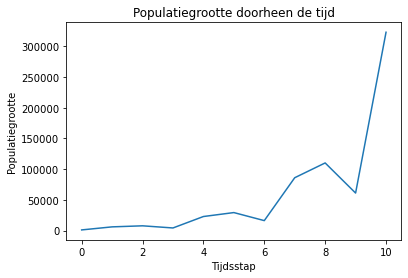

In [27]:
plot_populatiegrootte(L_new, v_t, 10)

Naast deze implementatie is het ook mogelijk om de functie `stackplot` te gebruiken, die de aandelen van de verschillende levensvormen visueel weergeeft. Dit kan als volgt (details niet te kennen, enkel informatief):

In [28]:
def plot_varianten(L, v, n):
    results = v.reshape(len(v), 1)
    for i in range(n):
        new = L @ results[:, -1]
        results = np.append(results, new.reshape(len(new), 1), 1)
    plt.stackplot(list(range(n + 1)), results[:3], baseline="zero")
    plt.legend(['Eitjes', 'Larven', 'Kevers'], loc='upper left', framealpha=1)
    plt.xlabel('Tijdsstap')
    plt.ylabel('Aantal')
    plt.title('Aandeel eitjes, larven en kevers')
    plt.show()

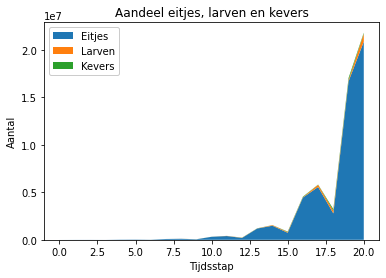

In [29]:
plot_varianten(L_new, v_t, 20)

Hier stellen we duidelijk vast dat het grootste deel van de populatie bestaat uit eitjes, en dat er over het algemeen meer larven dan kevers zijn. In het volgende voorbeeld zal het verschil tussen verschillende categorieën minder uitgesproken zijn.

## De insecten voorbij

De Lesliematrix werd in voorgaand voorbeeld uitsluitend gebruikt om een kever van één levensloop naar een andere te doen gaan, waarbij enkel een kever voor reproductie in de vorm van eitjes kon zorgen. Het model kan evenwel ook op andere manieren gebruikt worden. In wat volgt gebruiken we het model om de levensloop van een vrouw in kader te brengen.

We delen allereerst de levensloop van een vrouw in in perioden van tien jaar: van 0 tot 10 jaar, van 10 tot 20 jaar, etc. Vervolgens berekenen we de kans dat een pasgeboren meisje de leeftijd van 10 jaar haalt, dat een meisje van 10 de leeftijd van 20 jaar haalt, dat een vrouw van 20 de leeftijd van 30 haalt, etc. Deze kans gebruiken we als overgangswaarden van de ene toestand naar de volgende, net zoals we dat deden bij de kevers.

Om de kansen te berekenen, baseren we ons op de sterftetafel van 2022 in België, die [hier](https://statbel.fgov.be/sites/default/files/files/documents/bevolking/5.4%20Sterfte%2C%20levensverwachting%20en%20doodsoorzaken/5.4.3%20Sterftetafels%20en%20levensverwachting/sterftetafelsAE.xls) terug te vinden is. Om de kans te berekenen dat een pasgeboren meisje de leeftijd van 10 jaar haalt, volstaat het om het aantal meisjes van 10 jaar te delen door het aantal pasgeboren meisjes: $996227 / 1000000 \approx 0.9962$. Op een gelijkaardige manier kunnen we te werk gaan om de andere kansen te berekenen. Vul op basis van de sterftetafel volgende tabel verder aan:

|  Leeftijd |  Kans  |
|-----------|--------|
|   0 -  10 | 0.9962 |
|  10 -  20 | 0.9989 |
|  20 -  30 | 0.9979 |
|  30 -  40 | 0.9955 |
|  40 -  50 | 0.9889 |
|  50 -  60 | 0.9708 |
|  60 -  70 | 0.9275 |
|  70 -  80 | 0.8189 |
|  80 -  90 | 0.4949 |
|  90 - 100 | 0.0699 |
| 100 - 110 | 0      |

De laatste waarde van 0 is een onderschatting van de werkelijke kans om 110 jaar te worden wanneer de leeftijd van 100 bereikt wordt, maar we gebruiken deze hier bij gebrek aan data.

Naast deze faseovergangen gedurende de levensloop van een vrouw, moeten we ook rekening houden met de geboorte van nieuwe dochters. Hierbij kunnen we uitgaan van volgende fictieve data:

|  Leeftijd | # dochters |
|-----------|------------|
|   0 -  10 | 0          |
|  10 -  20 | 0.05       |
|  20 -  30 | 0.57       |
|  30 -  40 | 0.49       |
|  40 -  50 | 0.04       |
|  50 -  60 | 0          |
|  60 -  70 | 0          |
|  70 -  80 | 0          |
|  80 -  90 | 0          |
|  90 - 100 | 0          |
| 100 - 110 | 0          |

Dit houdt in dat de verwachtingswaarde van het aantal nieuwe dochters van tiener gelijk is aan 0.04, terwijl het verwachte aantal nieuwe dochters van een twintiger gelijk is aan 0.47.

## Opdracht 4

Ontwerp met behulp van `numpy` een Lesliematrix $L$ die bovenstaande gegevens omvat. Maak hierbij gebruik van de functie `zeros`, die het mogelijk maakt om een matrix met enkel nullen aan te maken:

In [30]:
M = np.zeros([4, 6])
print(M)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


Gebruik deze functie nu om een lege matrix $L$ aan te maken, en vervolgens de berekende/gegeven waarden in te vullen. We kunen dan de functies die hierboven geprogrammeerd werden opnieuw gebruiken om op basis van een toestand $v_t$ op tijdstip $t$ de nieuwe toestand $v_{t + 1}$ tien jaar later te berekenen. We starten vanuit deze toestand:

$$v_t = [660000, 656000, 650000, 640000, 630000, 610000, 580000, 530000, 500000, 200000, 15000]$$

In [31]:
# Matrix met nullen
L = np.zeros([11, 11])

# Overgang naar ander decennium
L[1, 0] = 0.9962
L[2, 1] = 0.9989
L[3, 2] = 0.9979
L[4, 3] = 0.9955
L[5, 4] = 0.9889
L[6, 5] = 0.9708
L[7, 6] = 0.9275
L[8, 7] = 0.8189
L[9, 8] = 0.4949
L[10, 9] = 0.0699

# Aantal geboortes
L[0, 1] = 0.05
L[0, 2] = 0.57
L[0, 3] = 0.49
L[0, 4] = 0.04

# Print de matrix
print(L)

[[0.     0.05   0.57   0.49   0.04   0.     0.     0.     0.     0.
  0.    ]
 [0.9962 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.    ]
 [0.     0.9989 0.     0.     0.     0.     0.     0.     0.     0.
  0.    ]
 [0.     0.     0.9979 0.     0.     0.     0.     0.     0.     0.
  0.    ]
 [0.     0.     0.     0.9955 0.     0.     0.     0.     0.     0.
  0.    ]
 [0.     0.     0.     0.     0.9889 0.     0.     0.     0.     0.
  0.    ]
 [0.     0.     0.     0.     0.     0.9708 0.     0.     0.     0.
  0.    ]
 [0.     0.     0.     0.     0.     0.     0.9275 0.     0.     0.
  0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.8189 0.     0.
  0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.4949 0.
  0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.0699
  0.    ]]


De huidige toestand wordt als volgt gedefinieerd:

In [32]:
# Huidige toestand
v = np.array([660000, 656000, 650000, 640000, 630000, 610000, 580000, 530000, 500000, 200000, 15000])

Als je de matrix $L$ juist gedefinieerd hebt, zal je in staat zijn om stap per stap de nieuwe toestand te berekenen. Doen we dit bijvoorbeeld voor $v_{t + 1}$:

In [33]:
v_new = L @ v
print(v_new)

[742100.  657492.  655278.4 648635.  637120.  623007.  592188.  537950.
 434017.  247450.   13980. ]


Net als bij de kevers, kunnen we ook hier het aandeel van elke categorie plotten doorheen de tijd:

In [34]:
def plot_leeftijden(L, v, n):
    results = v.reshape(len(v), 1)
    for i in range(n):
        new = L @ results[:, -1]
        results = np.append(results, new.reshape(len(new), 1), 1)
    plt.stackplot(list(range(n + 1)), results, baseline="zero")
    plt.legend([f'{10 * i} - {10 * i + 10}' for i in range(11)], loc='upper left', framealpha=1, bbox_to_anchor=(1, 1))
    plt.xlabel('Tijdsstap')
    plt.ylabel('Aantal')
    plt.title('Aandeel leeftijdscategorieën')
    plt.show()

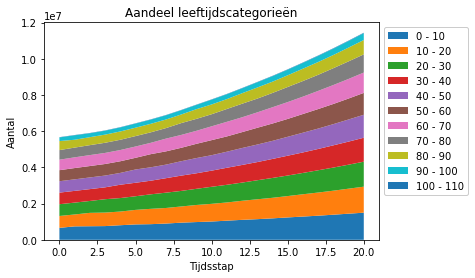

In [35]:
plot_leeftijden(L, v, 20)

We zien dat het aantal vrouwen in elke categorie stijgt. We wensen nu volgende vraag te beantwoorden: wanneer zal het totale aantal pasgeboren meisjes voor het eerst boven de 1 miljoen gaan?

Dit kan je bepalen door stap voor stap de nieuwe toestand te berekenen, en na te gaan hoeveel pasgeboren meisjes er zijn. Print in elke tussenstap uit hoeveel tijdsperioden er gepasseerd zijn, en hoeveel meisjes er dan zijn. Stop met itereren zodra het aantal pasgeboren meisjes groter is dan 1 miljoen. Wat is je antwoord?

In [36]:
i = 1
v_new = v
while True:
    v_new = L @ v_new
    print(f"{i}, {int(v_new[0])}")
    if v_new[0] > 1000000:
        break
    i += 1

1, 742100
2, 749699
3, 757562
4, 805447
5, 850157
6, 863946
7, 897461
8, 947118
9, 980257
10, 1010217
